# Recurrent Neural Networks

## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()

In [6]:
print(tf.__version__)

2.16.1


# Basic RNNs

## Manual RNN

Use tensorflow to impelment the forward step of RNN. The input size is 3 and the size of state is 5, you need to define the weights and operations for first two steps in tensorflow.

In [7]:
reset_graph()

n_inputs = 3
n_neurons = 5

# TODO : define the place holder for the finput of first time step and the second time step, expect 2 lines of the code
X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

# TODO : define the weights of the Basic RNN, don't forget the bias, 3 lines of code exptected
Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

# TODO : calculate the output for the first time step and second time step
Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [8]:
import numpy as np

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

# TODO : practice to create a session and evaluate on Y0 and Y1, use variable Y0_val to save the output of the first step x
# use Y1_val to save the output of the second step
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

2024-04-05 20:33:56.713206: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


In [9]:
print(Y0_val)

[[ 0.12020043  0.44310325  0.01446921 -0.8499385   0.99186   ]
 [-0.94592494  0.6544402  -0.99291945 -0.9999941   0.99999976]
 [-0.9987877   0.7968659  -0.9999755  -0.99999976  0.99999976]
 [-0.97810966  0.9999704  -0.5441994  -0.99999976  0.9960072 ]]


In [10]:
print(Y1_val)

[[-0.99999976 -0.90785277 -0.99999976 -0.99999976  0.99999976]
 [ 0.46041262 -0.9532766  -0.9636991   0.9714265   0.1698459 ]
 [-0.9976139  -0.94382584 -0.99999976 -0.9999977   0.99999976]
 [-0.97473055 -0.95060366 -0.9999533  -0.9910696   0.99739045]]


## Using `static_rnn()`

**Note**: `tf.contrib.rnn` was partially moved to the core API in TensorFlow 1.2. Most of the `*Cell` and `*Wrapper` classes are now available in `tf.nn.rnn_cell`, and the `tf.contrib.rnn.static_rnn()` function is available as `tf.nn.static_rnn()`.

In [11]:
import tensorflow.keras as keras

In [12]:
n_inputs = 3
n_neurons = 5

<div class='alert alert-warning'>this code is using depreciated tensorflow version: code does not work and tf 2.10 is not installable - earliest version available is 2.13</div>

In [13]:
!pip3 install tensorflow<=2.10

zsh:1: 2.10 not found


In [14]:
!pip3 install tensorflow==2.10

ERROR: Could not find a version that satisfies the requirement tensorflow==2.10 (from versions: 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.10
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [15]:
reset_graph()
import tensorflow

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])


basic_cell = keras.layers.SimpleRNNCell(units=n_neurons) 
output_seqs, states = tf.nn.static_rnn(basic_cell, [X0, X1],
                                       dtype=tf.float32) 
Y0, Y1 = output_seqs

Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API


TypeError: SimpleRNNCell.get_initial_state() got an unexpected keyword argument 'inputs'

In [ ]:
reset_graph()
import tensorflow

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])


basic_cell = keras.layers.SimpleRNNCell(units=n_neurons) 
output_seqs, states = keras.layers.RNN(basic_cell, [X0, X1],
                                       dtype=tf.float32) 
Y0, Y1 = output_seqs

TypeError: cannot unpack non-iterable RNN object

In [ ]:
init = tf.global_variables_initializer()

<div class='alert alert-warning'>This code is using depreciated tensorflow version: code does not work and tf 2.10 is not installable - earliest version available is 2.13</div>

In [16]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

# TODO : create a session, initialize the variables and run the graph to get the output of the RNN
with tf.Session() as sess:
    writer = tf.summary.FileWriter("output", sess.graph)
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch}) 
    writer.close()

ValueError: Cannot use the default session to execute operation: the operation's graph is different from the session's graph. Pass an explicit session to run(session=sess).

In [17]:
Y0_val

array([[ 0.12020043,  0.44310325,  0.01446921, -0.8499385 ,  0.99186   ],
       [-0.94592494,  0.6544402 , -0.99291945, -0.9999941 ,  0.99999976],
       [-0.9987877 ,  0.7968659 , -0.9999755 , -0.99999976,  0.99999976],
       [-0.97810966,  0.9999704 , -0.5441994 , -0.99999976,  0.9960072 ]],
      dtype=float32)

In [18]:
Y1_val

array([[-0.99999976, -0.90785277, -0.99999976, -0.99999976,  0.99999976],
       [ 0.46041262, -0.9532766 , -0.9636991 ,  0.9714265 ,  0.1698459 ],
       [-0.9976139 , -0.94382584, -0.99999976, -0.9999977 ,  0.99999976],
       [-0.97473055, -0.95060366, -0.9999533 , -0.9910696 ,  0.99739045]],
      dtype=float32)

## Packing sequences

In [19]:
n_steps = 2
n_inputs = 3
n_neurons = 5

<div class='alert alert-warning'>This code is using depreciated tensorflow version: code does not work and tf 2.10 is not installable - earliest version available is 2.13</div>

In [20]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))

basic_cell = keras.layers.SimpleRNNCell(units=n_neurons)
output_seqs, states = tf.nn.static_rnn(basic_cell, X_seqs,
                                       dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

TypeError: SimpleRNNCell.get_initial_state() got an unexpected keyword argument 'inputs'

In [21]:
init = tf.global_variables_initializer()

In [22]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

NameError: name 'outputs' is not defined

In [23]:
print(outputs_val)

NameError: name 'outputs_val' is not defined

In [24]:
print(np.transpose(outputs_val, axes=[1, 0, 2])[1])

NameError: name 'outputs_val' is not defined

## Using `dynamic_rnn()`

In [25]:
n_steps = 2
n_inputs = 3
n_neurons = 5

<div class='alert alert-warning'>This code is using depreciated tensorflow version: code does not work and tf 2.10 is not installable - earliest version available is 2.13</div>

In [26]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = keras.layers.SimpleRNNCell(units=n_neurons)

outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32) # TODO : with dynamic_rnn you don't need to transpose and unstack your input sequence. 

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


TypeError: SimpleRNNCell.get_initial_state() got an unexpected keyword argument 'inputs'

In [27]:
init = tf.global_variables_initializer()

In [28]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

NameError: name 'outputs' is not defined

In [29]:
print(outputs_val)

NameError: name 'outputs_val' is not defined

## Setting the sequence lengths

In [30]:
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = keras.layers.SimpleRNNCell(units=n_neurons)

<div class='alert alert-warning'>This code is using depreciated tensorflow version: code does not work and tf 2.10 is not installable - earliest version available is 2.13</div>

In [31]:
# TODO : create a placeholder for seq_length and set this as an extra parameter in dynamic_rnn, expect 2 lines of code
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, sequence_length=seq_length)

TypeError: SimpleRNNCell.get_initial_state() got an unexpected keyword argument 'inputs'

In [32]:
init = tf.global_variables_initializer()

In [33]:
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])
seq_length_batch = np.array([2, 1, 2, 2])

In [34]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
        [outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

NameError: name 'outputs' is not defined

In [35]:
print(outputs_val)

NameError: name 'outputs_val' is not defined

In [36]:
print(states_val)

NameError: name 'states_val' is not defined

## Training a sequence classifier

In [37]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons) # TODO : define a basic cell with BasicRNNCell
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32) # TODO : create a rnn model with cell as a basic build block with dynamic_rnn

logits = tf.layers.dense(states, n_outputs) # TODO : create a dense layer
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits) # TODO : create loss function with sparse_softmax_cross_entropy_with_logits
loss = tf.reduce_mean(xentropy) # TODO : call tf.reduce_mean on the loss you defined
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) # TODO : define an AdamOptimizer with learning rate equals to learning_rate
training_op = optimizer.minimize(loss) # TODO : minimize the loss
correct = tf.nn.in_top_k(logits, y, 1) # TODO : count the number of correct prediction, you can use tf.nn.in_top_k
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) # calcuate the accuracy with tf.reduce_mean

init = tf.global_variables_initializer()

AttributeError: `BasicRNNCell` is not available with Keras 3.

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
learning_rate = 0.001

# Building the model using the Keras Sequential API
model = Sequential([
    # RNN layer
    SimpleRNN(n_neurons, input_shape=(n_steps, n_inputs)),
    # Dense layer for output
    Dense(n_outputs, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

model.summary()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'sequential/simple_rnn/simple_rnn_cell/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/ops/weak_tensor_ops.py", line 88, in wrapper
    return op(*args, **kwargs)  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/ops/numpy_ops/np_array_ops.py", line 316, in diag
    control_flow_assert.Assert(  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py", line 155, in error_handler
    del filtered_tb  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py", line 1260, in op_dis

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 150)            │        26,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,360 (110.78 KB)

 Trainable params: 28,360 (110.78 KB)

 Non-trainable params: 0 (0.00 B)

**Warning**: `tf.examples.tutorials.mnist` is deprecated. We will use `tf.keras.datasets.mnist` instead.

In [39]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [40]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [41]:
X_test = X_test.reshape((-1, n_steps, n_inputs))

In [42]:
n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)

AttributeError: module 'tensorflow' has no attribute 'Session'

In [43]:
print("Eager execution:", tf.executing_eagerly())
print(tf.__version__)

Eager execution: False
2.16.1


In [72]:
import numpy as np
from tensorflow.keras.utils import to_categorical
tf.compat.v1.enable_eager_execution()

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed
n_epochs = 100
batch_size = 150

# Reshape the input data to match the expected input of the RNN
X_train_reshaped = X_train.reshape((-1, n_steps, n_inputs))
X_test_reshaped = X_test.reshape((-1, n_steps, n_inputs))

# Convert labels to one-hot encoding if they are not already
y_train_categorical = to_categorical(y_train, num_classes=n_outputs)
y_test_categorical = to_categorical(y_test, num_classes=n_outputs)

# Train the model
history = model.fit(X_train_reshaped, y_train_categorical, epochs=n_epochs, 
                    batch_size=batch_size, validation_data=(X_test_reshaped, y_test_categorical))

# Evaluate the model
evaluation = model.evaluate(X_test_reshaped, y_test_categorical)
print('Test loss:', evaluation[0])
print('Test accuracy:', evaluation[1])

ValueError: tf.enable_eager_execution must be called at program startup.

# Multi-layer RNN

In [44]:
reset_graph()

n_steps = 28
n_inputs = 28
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

In [ ]:
n_neurons = 100
n_layers = 3


layers = # TODO : build a cell list that contains multiple cells, you can use list comprehension to generate cell list.

multi_layer_cell =  # TODO : build a MultiRNNCell with list of BasicRNNCell objects (Hint: Read StackedRNNCells documentation)

outputs, states =  # TODO : put the multi_layer_cell in dynamic_rnn

In [ ]:
states_concat = tf.concat(axis=1, values=states) 
logits = tf.layers.dense(states_concat, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [ ]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)

# Time series

In [ ]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [ ]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")


save_fig("time_series_plot")
plt.show()

In [ ]:
X_batch, y_batch = next_batch(1, n_steps)

In [ ]:
np.c_[X_batch[0], y_batch[0]]

## Without using an `OutputProjectionWrapper`

Now let's create the RNN. It will contain 100 recurrent neurons and we will unroll it over 20 time steps since each training instance will be 20 inputs long. Each input will contain only one feature (the value at that time). The targets are also sequences of 20 inputs, each containing a single value:

In [ ]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [ ]:
cell = keras.layers.SimpleRNNCell(units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [ ]:
learning_rate = 0.001

In [ ]:
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [ ]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
    saver.save(sess, "./my_time_series_model")

In [ ]:
y_pred

In [ ]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

## Generating a creative new sequence

In [45]:
with tf.Session() as sess:                        # not shown in the book
    saver.restore(sess, "./my_time_series_model") # not shown

    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")

    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence1.append(y_pred[0, -1, 0])

    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence2.append(y_pred[0, -1, 0])

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
save_fig("creative_sequence_plot")
plt.show()

# Train a RNN model on external dataset

Now you've trained a RNN model on the data generated by a simple function, you've practiced how to deal with time series data. It's your turn to apply it on your favoriate time series dataset, the potential datasets can be found here https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=&numAtt=10to100&numIns=&type=ts&sort=nameUp&view=table. 

You have to build a LSTM model, it's almost the same as defining a basic rnn cell we've covered with tf.contrib.rnn.BasicLSTMCell, you may want to use tf.contrib.rnn.BasicLSTMCell to build your cell. And you need to define the appropriate input, output and the hidden state size. Build a graph and train on a batch of data. Finally you need to create a session to execute the graph and evaluate your model. You can replace the LSTM cell with RNN cell and tune the size of hidden state to see how they influence the model's performance.

Your code should be clean and organized, you need to elaborate how different models and hyperparameter influence your RNN's performance.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

import os

In [2]:
# importing training data
df_train = pd.read_csv('data/Google_Stock_Price_Train.csv')

# remove dates and set as np array
train_array = df_train.iloc[:, 1:2].values

In [3]:
# scale features - minmax for normalization
from sklearn.preprocessing import MinMaxScaler

# initialize scalar
sc = MinMaxScaler()
train_array_normalized = sc.fit_transform(train_array)

In [4]:
# create data structures
x_train = []
y_train =  []

# recalling 60 previous stock prices for x_train to predict y_train
for i in range(60, len(train_array_normalized)):

    # creates a sliding window
    x_train.append(train_array_normalized[i-60:i, 0])
    y_train.append(train_array_normalized[i, 0])

# convert training lists to np.array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [5]:
# reshape data structures - num of predictors
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
# building RNN architecture
# !pip3 install tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# initilising RNN
regressor = Sequential()


In [7]:
# create first LSTM layer and dropout regularisation
regressor.add(LSTM(
    units=50, # number of neurons for this LSTM layer
    return_sequences=True, # becuase we're going to make a stacked LSTM network
    input_shape=(x_train.shape[1], 1) # only contains the last two dimensions of x_train
))

regressor.add(Dropout(
    rate=0.2 # 20% of the neurons will be ignored/dropped out during training
))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# create second LSTM layer and dropout regularisation
regressor.add(LSTM(
    units=50, # number of neurons for this LSTM layer - keeping higher dimensionality 
    return_sequences=True # becuase we're going to make a stacked LSTM network
))

regressor.add(Dropout(
    rate=0.2 # 20% of the neurons will be ignored/dropped out during training
))

In [9]:
# create third LSTM layer and dropout regularisation
regressor.add(LSTM(
    units=50, # number of neurons for this LSTM layer - keeping higher dimensionality 
    return_sequences=True # becuase we're going to make a stacked LSTM network
))

regressor.add(Dropout(
    rate=0.2 # 20% of the neurons will be ignored/dropped out during training
))

In [10]:
# create fourth (last) LSTM layer and dropout regularisation
regressor.add(LSTM(
    units=50, # number of neurons for this LSTM layer - keeping higher dimensionality 
    return_sequences=False # becuase this is our final layer
))

regressor.add(Dropout(
    rate=0.2 # 20% of the neurons will be ignored/dropped out during training
))

In [11]:
# output layer
regressor.add(
    Dense(
        units=1 # the number of units/dimension in the output - stock price
    )
)

In [12]:
# compile the RNN with optimizer
regressor.compile(
    optimizer='adam', 
    loss='mean_squared_error'
)

In [13]:
# fit RNN to training set
regressor.fit(
    x_train,
    y_train,
    epochs=100, # number of iterations
    batch_size=32 # batches of stock prices to back and forward propogate on
)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1230
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0071
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0052
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0052
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0054
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0047
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0051
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0046
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0044
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0042
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0053
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0049
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0047
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0040
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - lo

In [14]:
# get test set
df_test = pd.read_csv('data/Google_Stock_Price_Test.csv')

# remove dates, isolate close price and set as np array
y_test_array = df_test.iloc[:, 1:2].values

In [15]:
# predict price
df_all = pd.concat(
    (
        df_train['Open'],
        df_test['Open']
    ),
    axis=0
)

# input to predict from - predicting the next 60 stock prices 
inputs = df_all[len(df_all) - len(df_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

x_test = []
# recalling 60 previous stock prices for x_train to predict y_train
for i in range(60, 80): # the test set only contains 20 days to predict on, 60+20 = 80

    # creates a sliding window
    x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_pred_array = regressor.predict(x_test)
y_pred_array = sc.inverse_transform(y_pred_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


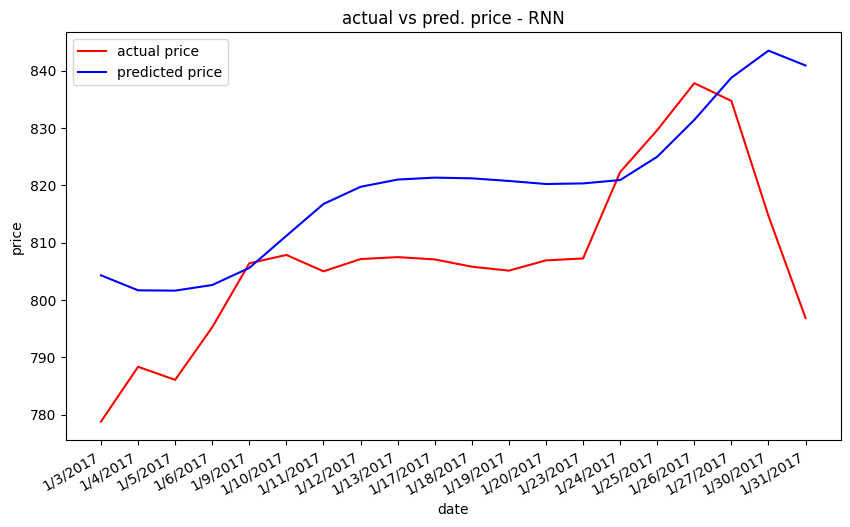

In [16]:
import matplotlib.dates as mdates

# visualize the final results
plt.figure(figsize=(10,6))
plt.plot(
    np.array(df_test.Date),
    y_test_array,
    color='red',
    label='actual price'
)

plt.plot(
    y_pred_array,
    color='blue',
    label='predicted price'
)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()

plt.title('actual vs pred. price - RNN')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

In [22]:
# visualizing the regressor model using keras plot
regressor.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)